# California Housing Prices Prediction
This notebook shows the process and orientation in building a model to predict housing prices in California.

In [ ]:

#Importing the require Library
import pandas as pd
import numpy as np
import math
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


In [161]:
#load the datasets
df_data=pd.read_excel("housing_data.csv.xlsx")
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [162]:
#Data Description 
df_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [163]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [164]:
df_data.tail()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [165]:
df_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [166]:
df_data["total_bedrooms"].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [167]:
df_data["total_bedrooms"].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [168]:
df_data["total_bedrooms"].mode()

0    280.0
dtype: float64

In [169]:
df_data["total_bedrooms"].mean()

537.8705525375618

In [170]:
df_data["total_bedrooms"].median()

df_data=df_data.fillna(df_data["total_bedrooms"].mean())
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [171]:
df_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [172]:
#Now, let's understand the correlation between variable by plotting correlation plot
df_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

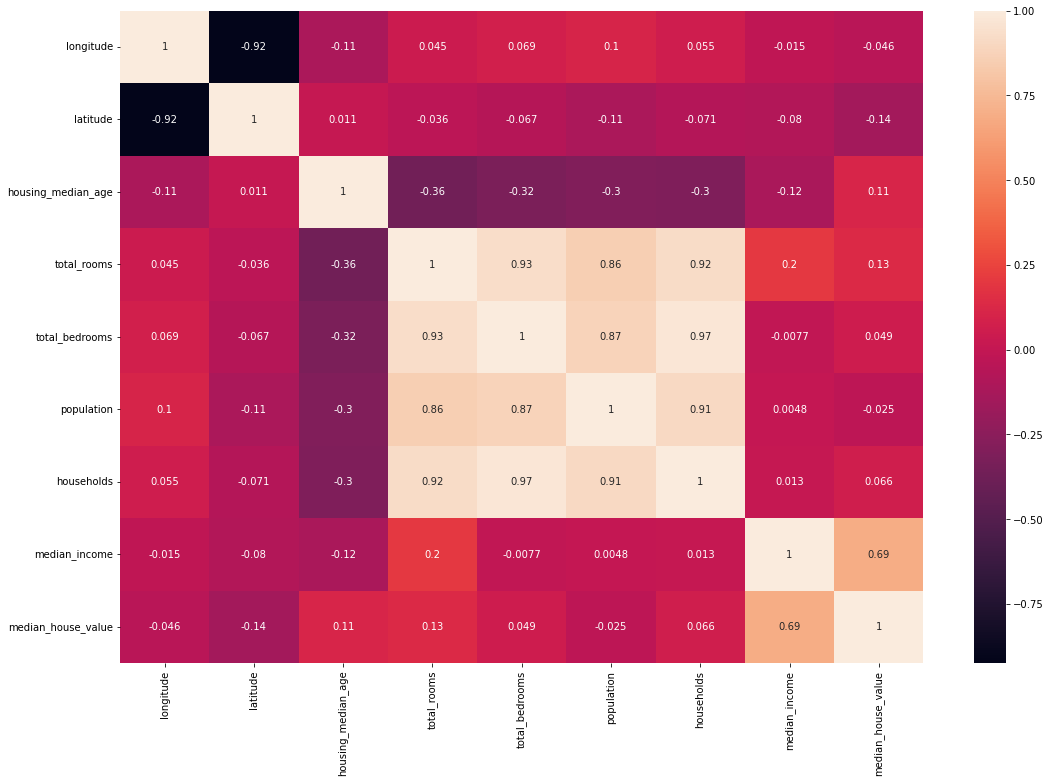

In [173]:
#Data exploratory
plt.figure(figsize=(18,12))
sns.heatmap(df_data.corr(), annot=True)

In [174]:
df_data.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

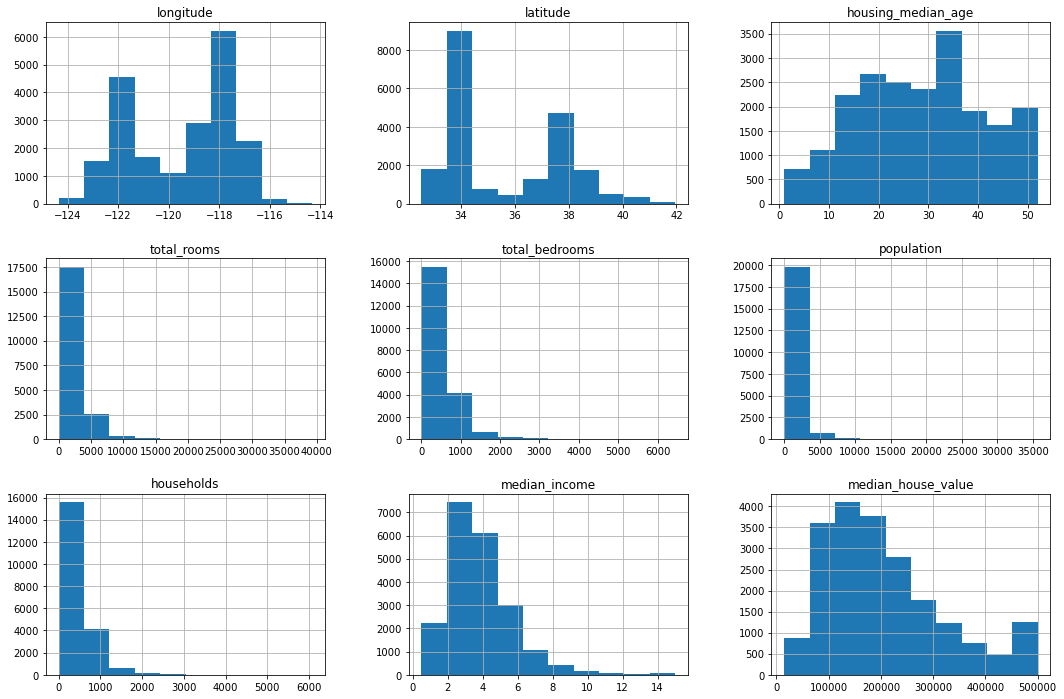

In [175]:
df_data.hist(figsize=(18,12))

A few things in these histograms we should notice:

The attributes have very different scales - we should perform feature scaling.

Many histograms are tail heavy - they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We need to transform these to have more bell-shaped distributions.

<AxesSubplot:>

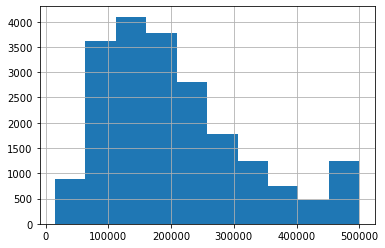

In [176]:
df_data.median_house_value.hist()

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

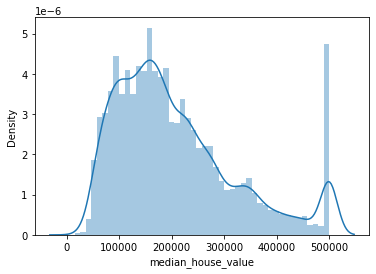

In [177]:
sns.distplot(df_data.median_house_value)

We can see that the median house value is mostly falls between 10,0000 to 30,0000 with few exceptions.

In [178]:
used_features=["median_income"]
X_data=df_data[used_features]
Y_target=df_data["median_house_value"]
X_data.head()

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [179]:
Y_target.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [180]:
from sklearn.linear_model import LinearRegression
from math import sqrt
model=LinearRegression()
model.fit(X_data,Y_target)
model.intercept_

45085.5767032679

In [181]:
model.coef_

array([41793.8492019])

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_target,test_size=0.3,random_state=42)
x_train.shape

(14448, 1)

In [183]:
x_test.head()

,median_income
20046,1.6812
3024,2.5313
15663,3.4801
20484,5.7376
9814,3.7250


In [184]:
y_train.shape

(14448,)

In [185]:
y_test.shape

(6192,)

In [186]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([115101.61806807, 150652.22793035, 190330.40536516, ...,
       191664.4418957 , 197435.50901838, 172427.55148675])

In [187]:
red_plot=sqrt(mean_squared_error(y_test,y_pred))
red_plot

83174.39430526982

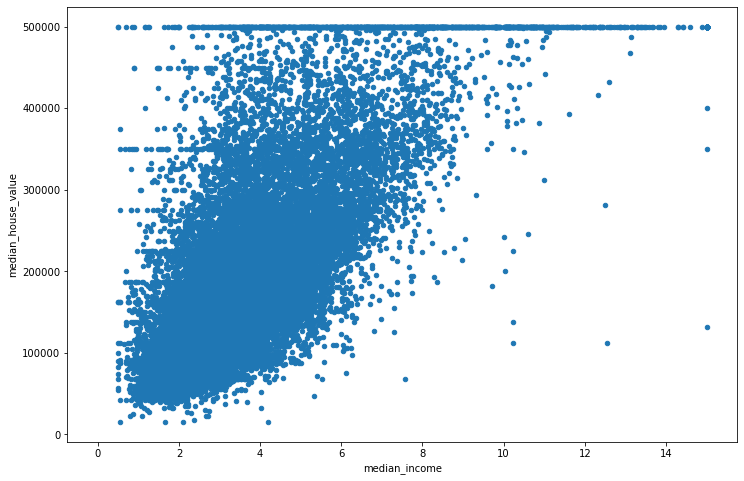

In [188]:
df_data.plot(kind="scatter",x="median_income",y="median_house_value",figsize=(12,8))
plt.plot(red_plot,color="red",linestyle="--",linewidth=0.3)
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

In [189]:
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [190]:
df_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [191]:
df_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [192]:
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [193]:
df_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [194]:
#Prepraing data for model fitting
used_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
#Data preprocessing
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df_data["ocean_proximity"] = labelEncoder.fit_transform(df_data["ocean_proximity"])
X=df_data[used_features]
y=df_data["median_house_value"]

In [195]:
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [196]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [197]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [198]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7061,-118.02,33.93,35,2400,398.0,1218,408,4.1312,0
14689,-117.09,32.79,20,2183,534.0,999,496,2.8631,4
17323,-120.14,34.59,24,1601,282.0,731,285,4.2026,4
10056,-121.00,39.26,14,810,151.0,302,138,3.1094,1
15750,-122.45,37.77,52,3188,708.0,1526,664,3.3068,3


In [199]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25,1505,537.870553,1392,359,1.6812,1
3024,-119.46,35.14,30,2943,537.870553,1565,584,2.5313,1
15663,-122.44,37.80,52,3830,537.870553,1310,963,3.4801,3
20484,-118.72,34.28,17,3051,537.870553,1705,495,5.7376,0
9814,-121.93,36.62,34,2351,537.870553,1063,428,3.7250,4


In [200]:
cols=X.columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=[cols])


In [201]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089


In [202]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7061,-118.02,33.93,35,2400,398.0,1218,408,4.1312,0
14689,-117.09,32.79,20,2183,534.0,999,496,2.8631,4
17323,-120.14,34.59,24,1601,282.0,731,285,4.2026,4
10056,-121.00,39.26,14,810,151.0,302,138,3.1094,1
15750,-122.45,37.77,52,3188,708.0,1526,664,3.3068,3


In [203]:

df_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [204]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_pred)))

69676.0926490362


In [205]:
import statsmodels.formula.api as smf
model=smf.ols(formula="median_house_value ~ longitude + latitude + housing_median_age+total_rooms+total_bedrooms + population+households+median_income+ocean_proximity",data=df_data).fit()
model.conf_int()

,0,1
Intercept,-3.696300e+06,-3.439339e+06
longitude,-4.403996e+04,-4.112482e+04
latitude,-4.380279e+04,-4.110390e+04
housing_median_age,1.059393e+03,1.228991e+03
total_rooms,-8.215888e+00,-5.168544e+00
total_bedrooms,7.058719e+01,9.429850e+01
population,-4.192445e+01,-3.769808e+01
households,6.483666e+01,9.143719e+01
median_income,3.912402e+04,4.043124e+04
ocean_proximity,-6.506958e+02,7.900293e+02


In [206]:
model.pvalues

Intercept              0.000000e+00
longitude              0.000000e+00
latitude               0.000000e+00
housing_median_age    1.316186e-151
total_rooms            7.890978e-18
total_bedrooms         4.034086e-42
population            4.201956e-289
households             1.372626e-30
median_income          0.000000e+00
ocean_proximity        8.496553e-01
dtype: float64

In [207]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:23:41   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20630   BIC:                         5.190e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.568e+06   6.55e+04    -54.430      0.000    -3.7e+06   -3.44e+06
longitude          -4.258e+04    743.628    -57.263      0.000    -4.4e+04   -4.11e+04
latitude           -4.245e+04    688.464    -61.664      0.000   -4.38e+04   -4.11e+04
housing_median_age  1144.1920     43.263     26.447      0.000    1059.393    1228.991
total_rooms           -6.6922      0.777     -8.609      0.000      -8.216      -5.169
total_bedrooms        82.4428      6.049     13.630      0.000      70.587      94.298
population           -39.8113      1.078    -36.927      0.000     -41.924     -37.698
households            78.1369      6.786     11.515      0.000      64.837      91.437
median_income       3.978e+04    333.461    119.287      0.000    3.91e+04    4.04e+04
ocean_proximity       69.6668    367.517      0.190      0.850    -650.696     790.029
==============================================================================
Omnibus:                     5037.491   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18953.000
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.054   Cond. No.                     5.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
#Implementing Decision Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini",random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [209]:
y_pred=model.predict(x_test)
y_pred

array([ 60800,  67900, 500000, ..., 186900, 170700, 225000], dtype=int64)

In [210]:
print(sqrt(mean_squared_error(y_test,y_pred)))

79095.66083356993


In [211]:
print(accuracy_score(y_test,y_pred))

0.027131782945736434


In [212]:
#Checking for model over fitting 
print(model.score(x_train,y_train))

1.0


In [213]:
print(model.score(x_test,y_test))

0.027131782945736434


In [ ]:
print(sqrt(mean_squared_error(y_test,y_pred))